인공지능의 공간 탐색 능력
  - 알파고, 알파스타
    - 현재 게임 상태에서 최적의 다음 상태를 탐색
  - 최적의 화학 구조식을 탐색  

상태공간에 대한 이해
  - 상태공간(바둑, 스도쿠) 은 발생할 수 있는 모든 상태를 포함하는 집합
  - 8 - 퍼즐  : 9! = 362,880

상태공간 트리(state space tree)
  - 상태는 서로 연결되어 있어 트리 형태로 그릴 수 있음
  - 목표 상태를 효율적으로 찾는 지능적인 공간 탐색 알고리즘을 고안해야 함

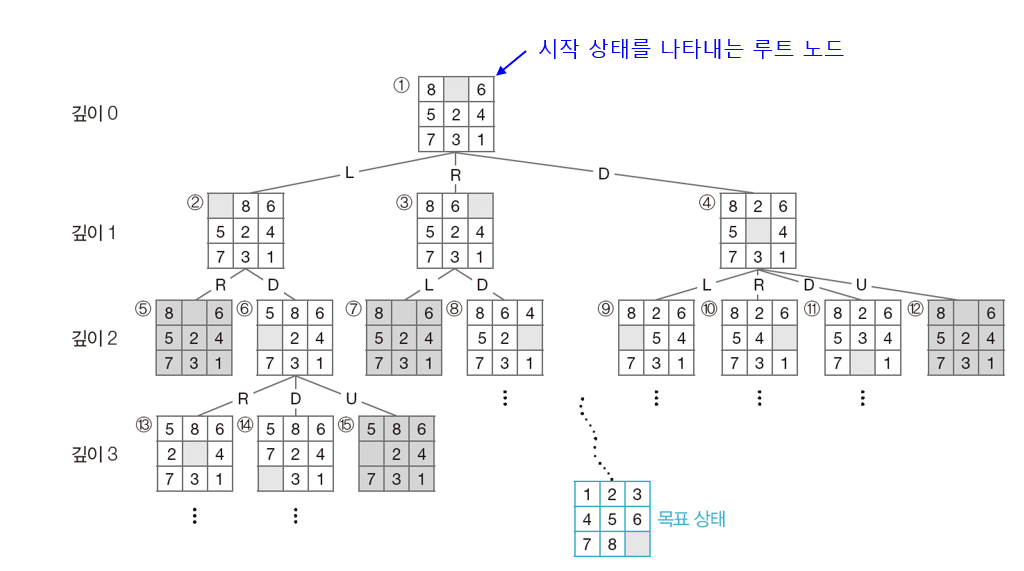

명목탐색(blind search)
  - 효율적인 전략 없이 미리 정해놓은 순서에따라서 탐색하는 알고리즘
  - 너비우선 탐색(BFS) 와 깊이우선 탐색(DFS)
  - 너비우선 탐색
  - 미니맥스 알고리즘= 깊이우선 탐색

너비우선탐색
  - 깊이 0에 있는 노드를 왼쪽부터 오른쪽순으로 모두 방문한다음, 깊이 1로 가서 같은 일을 하고 , 깊이 2로 가서 갚은일을 반복하는 방식 - 그림에서처럼 노드에 매겨진 번호 순서대로 탐색
  - 선입선출 방식 큐 자료구조를 이용 구현

In [ ]:
# 알고리즘
# 입력:탐색트리, 시작상태 start
# 빈 큐Q와 빈 리스트 V를 생성
# start를 Q,V에 삽입
# while(Q가 비어있지 않을때 까지)
#   Q에서 요소하나를 꺼내어 node라고 한다
#   if(node가 목표상태)
#     프로그램을 종료
#   else
#     node의 자식을 생성해서 child라고 한다
#     child에 있는 자식중에 v에 들어 있지 않는 것을 Q와 V에 삽입한다

In [ ]:
from math import sqrt
from queue import Queue
start = '806524731'
goal = '123456780'
# 보드크기
n = int(sqrt(len(goal)))
def print_puzzle(p):
  for i in range(n):
    print(p[n*i:n*(i+1)])

In [ ]:
print_puzzle(start)

806
524
731


In [ ]:
def Move(p):  # 빈 칸을 움직여 자식을 생성
  i = p.index('0')
  child=[]
  if not(i%n == 0):  # 좌변이 아니면
    child.append(p[:i-1]+p[i]+p[i-1]+p[i+1:])
  if not (i%n == n-1): # 우변이 아니면
    child.append(p[:i]+p[i+1]+p[i]+p[i+2:])
  if i>=n : # 상변이 아니면
    child.append(p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:])
  if i< n*n-n:
    child.append(p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:])
  return child

In [ ]:
p = '865204731'
child=[]
i = p.index('0')  # 1
child.append(p[:i-1]+p[i]+p[i-1]+p[i+1:])

child.append(p[:i]+p[i+1]+p[i]+p[i+2:])

child.append(p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:])

child.append(p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:])
print(child)



['865024731', '865240731', '805264731', '865234701']


In [ ]:
print_puzzle(start)
Q =Queue()
Q.put(start)  # 루트노드를 삽입
V = [start]
while not Q.empty():
  node = Q.get()
  if node == goal:
    print(len(V),"개 노드를 방문하고 답을 찾았습니다. ")
    break
  else:
    child = Move(node)
    for j in range(len(child)):
      if child[j] not in V:
        Q.put(child[j])
        V.append(child[j])

In [ ]:
# 경로 출력
from math import sqrt
from queue import Queue
start = '806524731'
goal = '123456780'
n = int(sqrt(len(goal))) # 보드크기

class Node():  # 경로를 저장하기 위해서
  def __init__(self,state,path):
    self.state = state
    self.path = path

def print_puzzle(state):
  for i in range(n):
    print(state[n*i:n*(i+1)])

def Move(node):  # node는 Node클래스
  p = node.state
  i = p.index('0')
  child=[]
  if not(i%n == 0):  # 좌변이 아니면
    q = p[:i-1]+p[i]+p[i-1]+p[i+1:]
    child.append(Node(q,node.path+'L'))
  if not (i%n == n-1): # 우변이 아니면
    q = p[:i]+p[i+1]+p[i]+p[i+2:]
    child.append(Node(q,node.path+'R'))
  if i>=n : # 상변이 아니면
    q = p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:]
    child.append(Node(q,node.path+'U'))
  if i< n*n-n:
    q = p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:]
    child.append(Node(q,node.path+'D'))
  return child

print_puzzle(start)
Q =Queue()
root = Node(start,'-')
Q.put(root)  # 루트노드를 삽입
V = [root.state]
while not Q.empty():
  node = Q.get()
  if node.state == goal:
    print(len(V),"개 노드를 방문하고 답을 찾았습니다. ")
    break
  else:
    child = Move(node)
    for j in range(len(child)):
      if child[j].state not in V:
        Q.put(child[j])
        V.append(node.state)
print(f"{node.path}({len(node.path)-1})")

In [ ]:
# 대략 160000 번대의 node 탐색이 이루어지고.. 실제이동은 20번대에서 정답
# 너비우선 탐색은 항상 최적의 해를 보장 -> 모든 깊이에서 가능한 모든 자식 노드를 살피기 때문
# 최적해를 보장하지만 너무 많은 대안을 살핀다-모든경우의수 느리다....
# 맹목탐색의 비효율성은 주어진 문제의 특성을 이용하지 않는다.
# 최고 우선 탐색은 자식을 평가한 후 가장 좋은 자식을 먼저 방문

상태의 좋은 정도를 측정하는 평가함수:evaluation function
  - 인공지능에서는 평가 함수를 휴리스틱 함수 : heuristic function
  - 두 가지 휴리스틱 함수
    - 불일치 수 : 제자리에 없는 수를 셈
    - 맨해튼 거리의 합 : 제자리를 찾아가는데 필요한 거리의 합


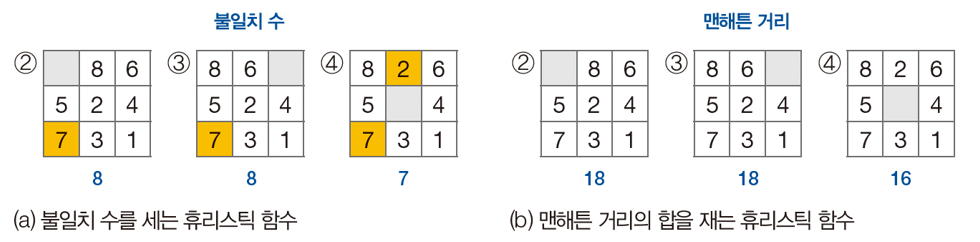    

In [ ]:
# 0,0 -> 2,2  :4
# 0,1 -> 2,1 :2

최고 우선 탐색을 구현하려면 빠른 우선순위 큐 필요
  - 삽입과 삭제를 빠르게 처리하고 가장 작은값을 가진 요소를 빠르게 찾는 효율적인 자료구조.... PriorityQueue

In [ ]:
from math import sqrt
from queue import PriorityQueue
start = '806524731'
goal = '123456780'
n = int(sqrt(len(goal)))

class Node():
  def __init__(self,state,path):
    self.state = state
    self.path = path
    self.val = self.f()  # 휴리스틱 함수 저장
  def f_mismatch(self): # 불일치 수를 세는 휴리스틱 함수
    return sum(self.state[i] != goal[i] for i in range(len(goal)))
  def f_manhattan(self): # 맨해튼 거리의 합을 계산하는 휴리스틱 함수
    dist = 0
    for i in range(len(goal)):
      r,c =  i//n, i%n
      r1,c1 = self.state.index(goal[i])//n, self.state.index(goal[i])%n
      dist += abs(r1-r) + abs(c1-c)
    return dist
  def f(self):
    return self.f_mismatch()
  def __lt__(self,other):
    return self.val < other.val

def Print_puzzle(state):
  for i in range(n):
    print(state[n*i:n*(i+1)])

def Move(node):  # node는 Node클래스
  p = node.state
  i = p.index('0')
  child=[]
  if not(i%n == 0):  # 좌변이 아니면
    q = p[:i-1]+p[i]+p[i-1]+p[i+1:]
    child.append(Node(q,node.path+'L'))
  if not (i%n == n-1): # 우변이 아니면
    q = p[:i]+p[i+1]+p[i]+p[i+2:]
    child.append(Node(q,node.path+'R'))
  if i>=n : # 상변이 아니면
    q = p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:]
    child.append(Node(q,node.path+'U'))
  if i< n*n-n:
    q = p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:]
    child.append(Node(q,node.path+'D'))
  return child

Print_puzzle(start)
Q= PriorityQueue()
root = Node(start,'-')
Q.put(root)
V=[root.state]
while not Q.empty():
  node = Q.get()
  if node.state == goal:
    print(len(V),"개 노드를 방문하고 답을 찾았습니다. ")
    break
  else:
    child = Move(node)
    for j in range(len(child)):
      if child[j].state not in V:
        Q.put(child[j])
        V.append(node.state)
print(f"{node.path}({len(node.path)-1})")

806
524
731
1560 개 노드를 방문하고 답을 찾았습니다. 
-DDRULDRUULDLURRDLDRUULDLDRUURDLDRUULDDLURURDLDRUULDDRUULDRULDLURRDLULDRRD(73)


In [ ]:
from math import sqrt
from queue import PriorityQueue
start = '806524731'
goal = '123456780'
n = int(sqrt(len(goal)))

class Node():
  def __init__(self,state,path):
    self.state = state
    self.path = path
    self.val = self.f()  # 휴리스틱 함수 저장
  def f_mismatch(self): # 불일치 수를 세는 휴리스틱 함수
    return sum(self.state[i] != goal[i] for i in range(len(goal)))
  def f_manhattan(self): # 맨해튼 거리의 합을 계산하는 휴리스틱 함수
    dist = 0
    for i in range(len(goal)):
      r,c =  i//n, i%n
      r1,c1 = self.state.index(goal[i])//n, self.state.index(goal[i])%n
      dist += abs(r1-r) + abs(c1-c)
    return dist
  def f(self):
    return self.f_manhattan()
  def __lt__(self,other):
    return self.val < other.val

def Print_puzzle(state):
  for i in range(n):
    print(state[n*i:n*(i+1)])

def Move(node):  # node는 Node클래스
  p = node.state
  i = p.index('0')
  child=[]
  if not(i%n == 0):  # 좌변이 아니면
    q = p[:i-1]+p[i]+p[i-1]+p[i+1:]
    child.append(Node(q,node.path+'L'))
  if not (i%n == n-1): # 우변이 아니면
    q = p[:i]+p[i+1]+p[i]+p[i+2:]
    child.append(Node(q,node.path+'R'))
  if i>=n : # 상변이 아니면
    q = p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:]
    child.append(Node(q,node.path+'U'))
  if i< n*n-n:
    q = p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:]
    child.append(Node(q,node.path+'D'))
  return child

Print_puzzle(start)
Q= PriorityQueue()
root = Node(start,'-')
Q.put(root)
V=[root.state]
while not Q.empty():
  node = Q.get()
  if node.state == goal:
    print(len(V),"개 노드를 방문하고 답을 찾았습니다. ")
    break
  else:
    child = Move(node)
    for j in range(len(child)):
      if child[j].state not in V:
        Q.put(child[j])
        V.append(node.state)
print(f"{node.path}({len(node.path)-1})")

806
524
731
488 개 노드를 방문하고 답을 찾았습니다. 
-DRDLURDLULURDDLURULDDRRUULDDLURRDLUURDDLLURRDLULDRR(51)


A스타 알고리즘
  - 트리를 타고 내려온 이전 기록은 무시한 채 현재 상황에서 어떤 경로로 트리를 타고 내려가야 가장 유리할지를 따짐
   - f(s) = g(s) + h(s)
   - g(s) 현재 상태 s까지 찾아오는데 사용한 비용(루트부터 s까지의 길이를 사용)
   - h(s)는 s에서 목표상태를 찾아가는데 필요한 비용의 추정치

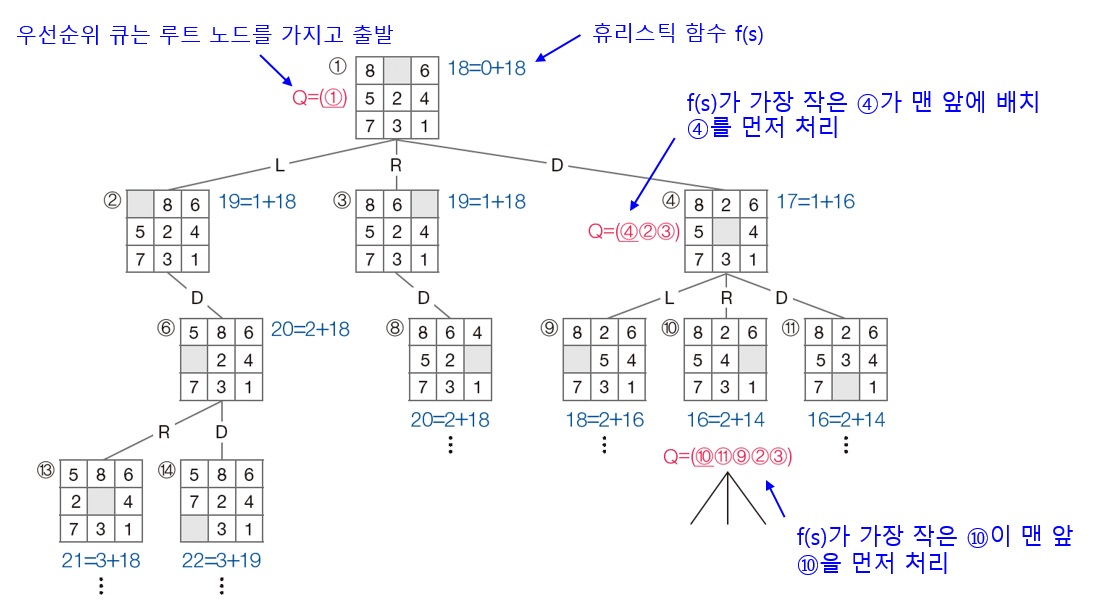

In [1]:
# A스타 알고리즘으로 8-퍼즐을 풀어....
from math import sqrt
from queue import PriorityQueue
start = '806524731'
goal = '123456780'
n = int(sqrt(len(goal)))

class Node():
  def __init__(self,state,path):
    self.state = state
    self.path = path
    self.val = self.f()  # 휴리스틱 함수 저장
  def f_mismatch(self): # 불일치 수를 세는 휴리스틱 함수
    return sum(self.state[i] != goal[i] for i in range(len(goal)))
  def f_manhattan(self): # 맨해튼 거리의 합을 계산하는 휴리스틱 함수
    dist = 0
    for i in range(len(goal)):
      r,c =  i//n, i%n
      r1,c1 = self.state.index(goal[i])//n, self.state.index(goal[i])%n
      dist += abs(r1-r) + abs(c1-c)
    return dist
  def f(self):
    return len(self.path) +  self.f_manhattan()
  def __lt__(self,other):
    return self.val < other.val

def Print_puzzle(state):
  for i in range(n):
    print(state[n*i:n*(i+1)])

def Move(node):  # node는 Node클래스
  p = node.state
  i = p.index('0')
  child=[]
  if not(i%n == 0):  # 좌변이 아니면
    q = p[:i-1]+p[i]+p[i-1]+p[i+1:]
    child.append(Node(q,node.path+'L'))
  if not (i%n == n-1): # 우변이 아니면
    q = p[:i]+p[i+1]+p[i]+p[i+2:]
    child.append(Node(q,node.path+'R'))
  if i>=n : # 상변이 아니면
    q = p[:i-n]+p[i]+p[i-n+1:i]+p[i-n]+p[i+1:]
    child.append(Node(q,node.path+'U'))
  if i< n*n-n:
    q = p[:i]+p[i+n]+p[i+1:i+n]+p[i]+p[i+n+1:]
    child.append(Node(q,node.path+'D'))
  return child

Print_puzzle(start)
Q= PriorityQueue()
root = Node(start,'-')
Q.put(root)
V=[root.state]
while not Q.empty():
  node = Q.get()
  if node.state == goal:
    print(len(V),"개 노드를 방문하고 답을 찾았습니다. ")
    break
  else:
    child = Move(node)
    for j in range(len(child)):
      if child[j].state not in V:
        Q.put(child[j])
        V.append(node.state)
print(f"{node.path}({len(node.path)-1})")

806
524
731
7535 개 노드를 방문하고 답을 찾았습니다. 
-DRULLDRDRULDLURULDDRUURDD(25)


미니맥스 알고리즘
  - 두사람이 번갈아 가면서 수를 두고 승패를 겨루는 게임으로 확장
  - 체스,바둑등...
  - 새로운 탐색 알고리즘

틱텍토 게임  tic-tack-toe
  -  두 플레이어가 모두 지능적이라면 항상 비기게 되어 있음
  - 상태공간의 크기는 9!


In [2]:
9*8*7*6*5*4*3*2*1

362880

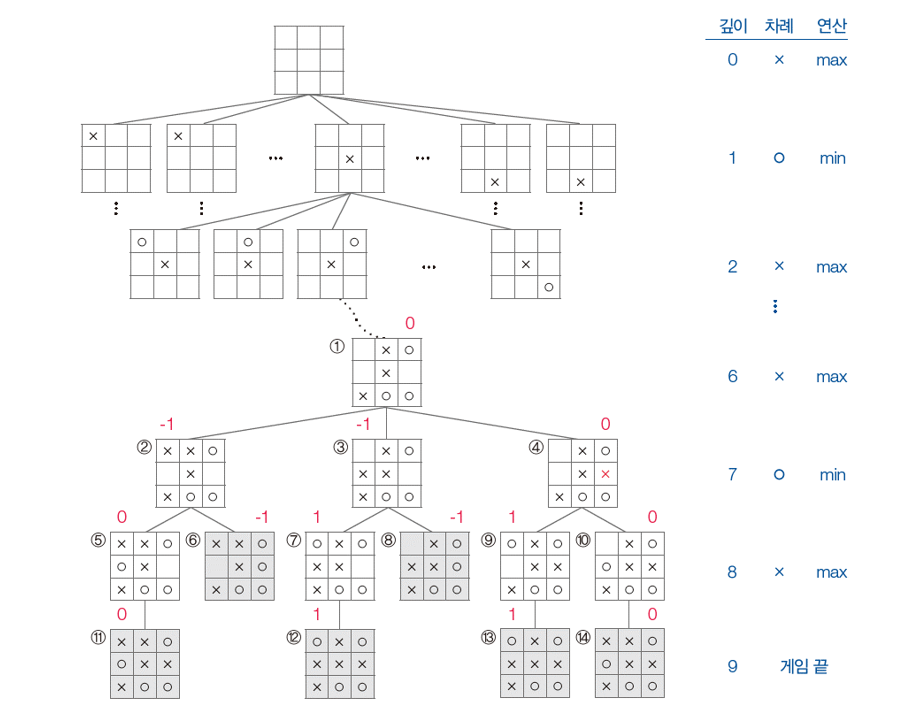

In [ ]:
# 입력 : 게임트리, 시작상태 start
# start = start
# player = 'X'
# while True:
#   if player =='X'
#     start를 루트노르로 설정하고 미니맥스를 적용해서 최적의 수 q를 찾는다
#   else
#     살람이 둔 수를 q라고 한다.
# state = Move(state,q ) state상태에서 q를 두고 새 상태를 만든다음 state에 저장
# if state가 승패가 정해진 상태, 종료
# player가 'x이면' 0 0면 x로 갱신

In [25]:
n=3
start = '-'*(n*n)
def Move(state,pos,player):
  return state[:pos]+player + state[pos+1:]
def switch_player(player):
  return 'X' if player == 'O' else 'O'
def print_board(state):
  print(' 0123456789012345'[:n+2])
  for i in range(n):
    print(str(i%10)+":"+state[n*i:n*(i+1)])
# 다음에 둘 수 있는 빈곳을 모으는 함수
def get_empty(state):
  if decide_winner(state) in ['O','X','T']: # 승자가 정해지면
    return []
  empty = []
  for i in range(len(start)):
    if state[i] == '-':
      empty.append(i)
  return empty

def decide_winner(state):
  for (a,b,c) in [(0,1,2), (3,4,5),(6,7,8), (0,3,6), (1,4,7),(2,5,8),(0,4,8),(2,4,6)]:
    if state[a] == state[b] == state[c]:
      if state[a] == 'O': return 'O'
      elif state[a] == 'X': return 'X'
  if [i for i in range(n*n) if state[i] == '-'] == []: return 'T'  # 비김
  return 'N'  # 아직 승자가 정해지지 않음

def minimax(state,player, depth):
  # 승패가 결정된 경우
  winner = decide_winner(state)
  if winner == 'X':
    return 1,None
  elif winner == 'O':
    return -1,None
  elif winner == 'T':
    return 0,None

  e=get_empty(state)
  if depth%2 == 0:  # 인공지능 차례(max 적용)
    vmax,bestpos = -100,None
    for pos in e:
      v,_ = minimax(Move(state,pos,player),switch_player(player), depth+1)
      if v > vmax:
        vmax,bestpos = v,pos
    return vmax, bestpos
  else: #사람 차례(min 적용)
    vmin,bestpos = 100,None
    for pos in e:
      v,_ = minimax(Move(state,pos,player),switch_player(player), depth+1)
      if v < vmin:
        vmin,bestpos = v,pos
    return vmin, bestpos

def tictactoe_play(first_mover):
  state = start
  player = first_mover
  print_board(state)

  count_ = 0

  while True:
    if player == 'X':  # 인공지능 차례를 처리
      print("컴퓨터 차례입니다.")
      val, pos = minimax(state,player,0)
      print(f"computer pos : {pos}")
    elif player == 'O': #사람 차례를 처리
      x,y = input("사람 차례입니다.(x와 y를 공백 구분해서 입력하세요)").split()
      pos = int(x)*n + int(y)
    if state[pos] != '-':
      print("둘 수 없는 곳입니다.")
      # print(state[pos])
      # # 디버깅 코드
      # if count_ > 5:
      #   break
      # count_ += 1
      # #
      continue
    state = Move(state,pos,player)
    # print(f"state : {state}")
    print_board(state)
    winner = decide_winner(state)
    if winner in ['O','X','T']:
      if winner == 'T': print('비겼습니다.')
      else: print(winner,'가 이겼습니다.')
      break
    player = switch_player(player)
    # print(f"player : {player}")

In [28]:
tictactoe_play('O')

 0123
0:---
1:---
2:---
사람 차례입니다.(x와 y를 공백 구분해서 입력하세요)0 0
 0123
0:O--
1:---
2:---
컴퓨터 차례입니다.
computer pos : 4
 0123
0:O--
1:-X-
2:---
사람 차례입니다.(x와 y를 공백 구분해서 입력하세요)2 0
 0123
0:O--
1:-X-
2:O--
컴퓨터 차례입니다.
computer pos : 3
 0123
0:O--
1:XX-
2:O--
사람 차례입니다.(x와 y를 공백 구분해서 입력하세요)1 2
 0123
0:O--
1:XXO
2:O--
컴퓨터 차례입니다.
computer pos : 1
 0123
0:OX-
1:XXO
2:O--
사람 차례입니다.(x와 y를 공백 구분해서 입력하세요)2 1
 0123
0:OX-
1:XXO
2:OO-
컴퓨터 차례입니다.
computer pos : 8
 0123
0:OX-
1:XXO
2:OOX
사람 차례입니다.(x와 y를 공백 구분해서 입력하세요)0 2
 0123
0:OXO
1:XXO
2:OOX
비겼습니다.


미니맥스는 너비 우선 탐색을 하기때문에 비 효율적
 - 위의 트리구조를 보시면. 모든 깊이에서 가능한 모든 수를  살피기 때문에
 - 바닥 깊이인 9까지 내려가면 8! 40320개의 노드가 있음
 - 3*3 수많은 노드가 발생.... 체스나 바둑에서는 적용 불가능

인공지능은 두 가지 방법으로 비효율성을 해결
  - 감당할 수 있는 정도까지만 내려가서 승패가 결정되지 않은 상태에 휴리스틱 함수 적용

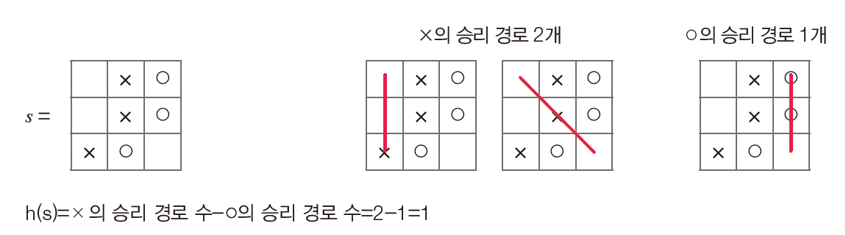

알파베타 가지치기
  - 깊이우선 탐색을 수행
  - 베타절단(max 에서 가지치기)
  - 알파절단(min에서 가지치기)

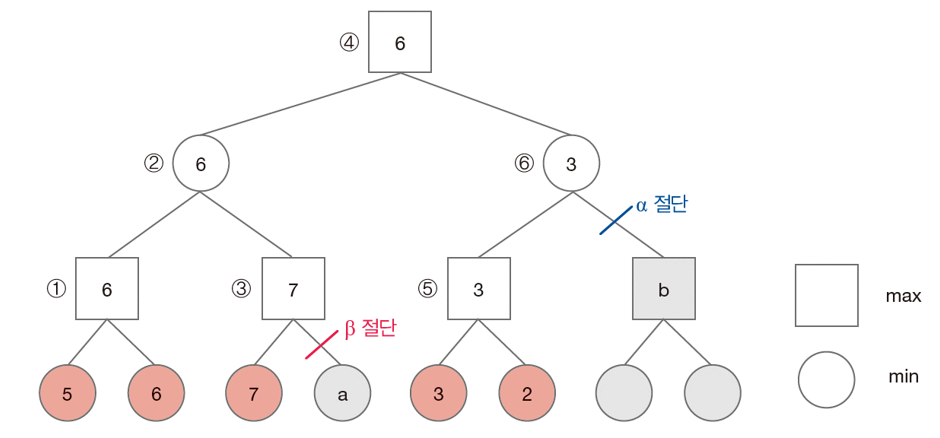

미니맥스 알고리즘의 한계
  - 효율을 높여주지만 과다한 계산 시간은 여전
  - 휴리스틱함수 계산에 1밀리초 소요
    - 단말 노드가 100만 개일때 한 수를 두는데 16.6분 소요
    - 분기 계수가 10이고 10수를 내다보려면 10의10승 100억개의 노드 ->16600분 = 100일 소요
    - 알파베타 가지치기로 10% 줄여도. 11일 소요    

- 휴리스틱 함수 없이 동작하는 탐색 알고리즘이 가능?
- 몬테카를로 방법
  - 난수를 생성해서 시뮬레이션 하는 기법 - 통계기법
- 몬테카를로 트리 탐색을 줄여서 MCTS(Monte Carlo Tree Search)  

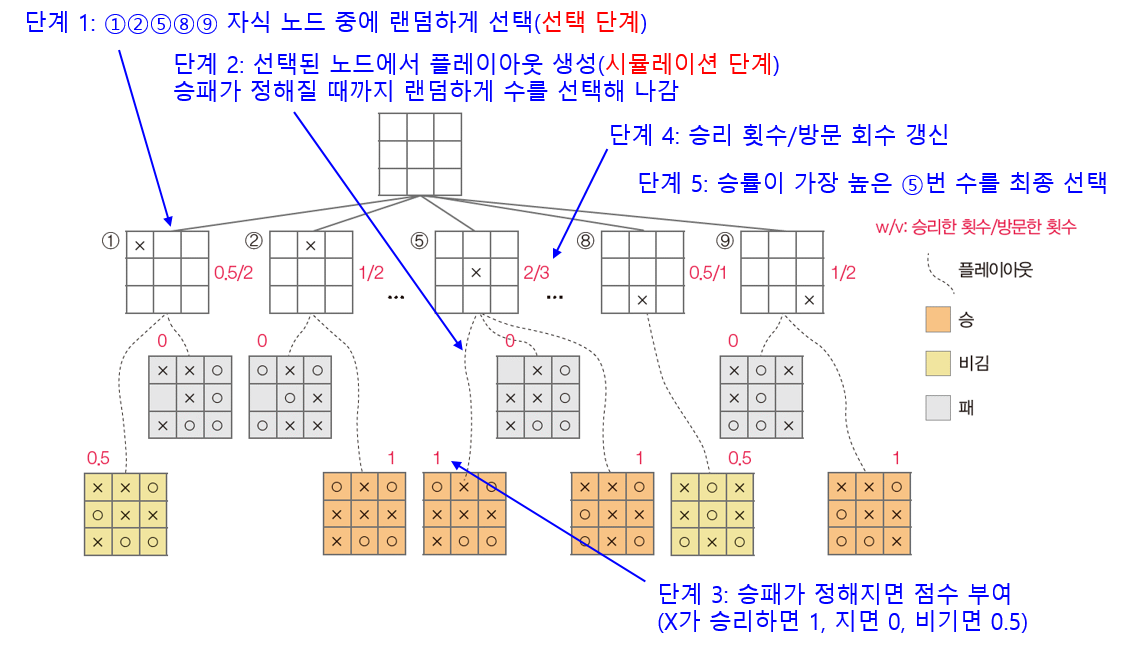

- 무작위로 수를 선택해서 플레이아웃을 만들고, 승률이 높으면 좋은 수일 가능성이 높다라는 믿음이 바탕 -> 실제 실험을 통해서 검증
- 미니맥스와 비교
  - 미니맥스 정교화 휴리스틱 함수를 통해 최적에 가까운 수를 찾는 전략
  - MCTS는 랜덤하게 수를 두고, 승률이 높은 수를 최적에 가까운 수로 간주
    - MCTS는 휴리스틱함수를 설계할 필요가 없음
    - 게임 종료할때까지 가보기 때문에 점수 계산이 쉬움
    - GPU 병렬처리를 사용 샘플리수를 획기적으로 늘림

- 선택
  - 좋은 것을 자주선택하지만 아직 시도해보지 않는 것도 선택하는 균형잡힌 전략(탐사와 탐험의 균형)
  - UCT(upper confidence tree) 공식을 사용해서 균형을 유지
  - 알고리즘
    - root 에서 시작해서 완전 확장된 노드에 UCT를 적용해서 트리를 내려가다가 확장이 안된 노드를 만나면 단말 모드 t로 설정하고 확장 단계로 넘어간다.


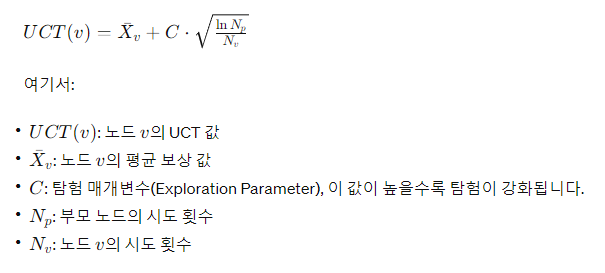    

- 확장
  - 단말 노드의 자식중에 랜덤하게 하나를 선택
- 시뮬레이션
  - 게임종료 까지 진행해서 플레이아웃 하나를 생성하고 누가 승리했는지 판정
- 역전파
  - 역으로 올라가면서 root까지 있는 경로에 노드 v와 w를 갱신

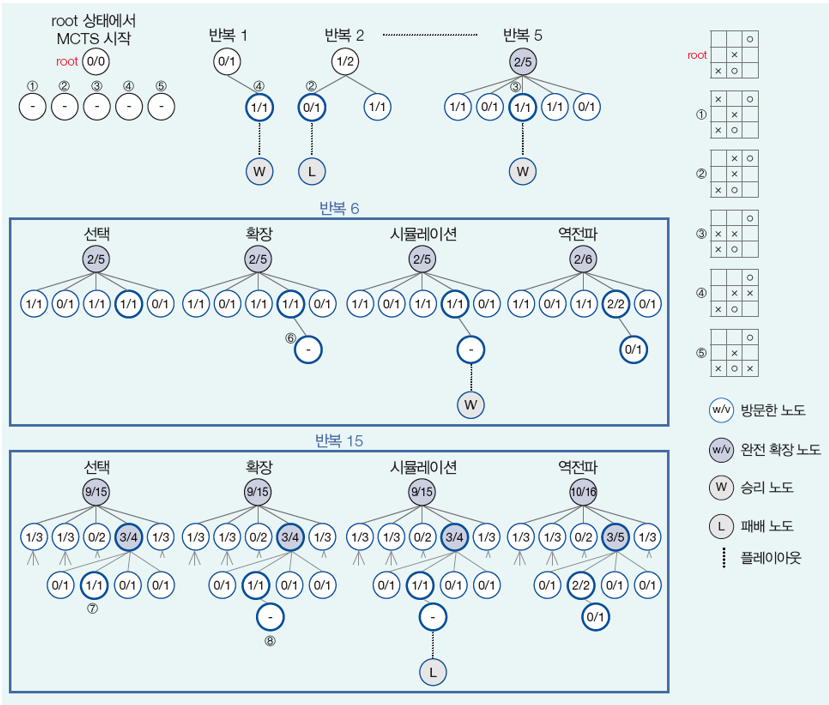

In [29]:
# 틱택토를 몬테카를로 트리 탐색 적용

In [31]:
from math import sqrt,log
import random

n=3
start='-'*(n*n)

class Node():  # 노드를 표현하는 클래스
    def __init__(self,state,player=None,pos=None,parent=None):
        self.state=state
        self.player=player
        self.pos=pos
        self.parent=parent
        self.nwin=0
        self.nvisit=0
        self.untried=get_empty(state)
        self.children=[]

    def UCTselect(self):  # UTC를 적용해서 가장 큰 값을 가진 노드를 선택하는 함수
        s=sorted(self.children, key=lambda c: c.nwin/c.nvisit+sqrt(log(self.nvisit)/c.nvisit))
        return s[-1]

    def makeChild(self,state,pos,player): # 노드 c를 t에 걸어주는 함수
        node=Node(state,player,pos,parent=self)
        self.untried.remove(pos)
        self.children.append(node)
        return node

    def update(self,winner): # 역전파 단계에서 w/v를 갱신하는 함수
        self.nvisit+=1
        if winner=='T': # 비긴 경우
            self.nwin+=0.5
        elif winner==self.player:
            self.nwin+=1

    def __repr__(self):
        return str(self.state)+" "+str(self.nwin)+"/"+str(self.nvisit)

def Move(state,pos,player):
    return state[:pos]+player+state[pos+1:]

def switch_player(player):
    return 'X' if player=='O' else 'O'

def print_board(state):
    print('  0123456789012345'[:n+2])
    for i in range(n):
        print(str(i%10)+':'+state[n*i:n*(i+1)])

def get_empty(state):
    if decide_winner(state) in ['O','X','T']: # 승자가 정해지면
        return []
    empty=[]
    for i in range(len(start)):
        if state[i]=='-':
            empty.append(i)
    return empty

def decide_winner(state):
    for (a,b,c) in [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]:
        if state[a]==state[b]==state[c]:
            if state[a]=='O': return 'O'
            elif state[a]=='X': return 'X'
    if [i for i in range(n*n) if state[i]=='-']==[]: return 'T' # Tie (비김)
    return 'N' # 아직 승자 정해지지 않음

def mcts(state,player):
    root=Node(state)  # 현재상태 state를 트리의 루트 노드로 설정

    for i in range(10000):  # 1000개의 플레이아웃을 생성
        node=root
        state=node.state
        roll_player=player
        while node.untried==[] and node.children!=[]: # 선택
            node = node.UCTselect()
            state=Move(state,node.pos,roll_player)
            roll_player=switch_player(roll_player)

        if node.untried!=[]: # 확장
            pos=random.choice(node.untried)
            state=Move(state,pos,roll_player)
            node=node.makeChild(state,pos,roll_player)
            roll_player=switch_player(roll_player)

        while True: # 시뮬레이션
            e=get_empty(state)
            if e==[]: break
            state=Move(state,random.choice(e),roll_player)
            roll_player=switch_player(roll_player)

        winner=decide_winner(state) # 백트랙킹
        while node!=None:
            node.update(winner);
            node = node.parent

    return sorted(root.children,key=lambda c:c.nwin/c.nvisit)[-1].pos  # 승률이 가장 높은 자식 노드를 반환

def tictactoe_play(first_mover):
    state=start
    player=first_mover
    print_board(state)
    while True:
        if player=='X':
            print("컴퓨터 차례입니다.")
            pos=mcts(state,player)
        elif player=='O':
            x,y=input("사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)").split()
            pos=int(y)+int(x)*n
            if state[pos]!='-':
                print("둘 수 없는 곳입니다.")
                continue
        state=Move(state,pos,player)
        print_board(state)
        winner=decide_winner(state)
        if winner in ['O','X','T']:
            if winner=='T': print('비겼습니다.')
            else: print(winner,'가 이겼습니다.')
            break
        player=switch_player(player)

# 틱택토를 시작하는 main
tictactoe_play('O')

  012
0:---
1:---
2:---
사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)1 1
  012
0:---
1:-O-
2:---
컴퓨터 차례입니다.
  012
0:X--
1:-O-
2:---
사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)0 1
  012
0:XO-
1:-O-
2:---
컴퓨터 차례입니다.
  012
0:XO-
1:-O-
2:-X-
사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)2 0
  012
0:XO-
1:-O-
2:OX-
컴퓨터 차례입니다.
  012
0:XOX
1:-O-
2:OX-
사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)1 2
  012
0:XOX
1:-OO
2:OX-
컴퓨터 차례입니다.
  012
0:XOX
1:XOO
2:OX-
사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)2 2
  012
0:XOX
1:XOO
2:OXO
비겼습니다.


틱택토 : 3x3x3

오목은 : 19 x 19 x 5

In [ ]:
from math import sqrt,log
import random
import time

n=10  # 10 10으로 크기를 축소
k=5
start='-'*(n*n)

class Node():
    def __init__(self,state,player=None,pos=None,parent=None):
        self.state=state
        self.player=player
        self.pos=pos
        self.parent=parent
        self.nwin=0
        self.nvisit=0
        self.untried=get_empty(state)
        self.children=[]

    def UCTselect(self):
        s=sorted(self.children,key=lambda c:c.nwin/c.nvisit+sqrt(log(self.nvisit)/c.nvisit))
        return s[-1]

    def makeChild(self,state,pos,player):
        node=Node(state,player,pos,parent=self)
        self.untried.remove(pos)
        self.children.append(node)
        return node

    def update(self,winner):
        self.nvisit+=1
        if winner=='T': # 비긴 경우
            self.nwin+=0.5
        elif winner==self.player:
            self.nwin+=1

    def __repr__(self):
        return str(self.state)+" "+str(self.nwin)+"/"+str(self.nvisit)

def randomAroundCenter(n):  # 인공지능이 선수일때 첫 수를 보드 중앙에 부근에 두게 하는 함수
    c=n*(n//2)+n//2
    return random.choice([c,c-1,c+1,c-n,c+n])

def Move(state,pos,player):
    return state[:pos]+player+state[pos+1:]

def switch_player(player):
    return 'X' if player=='O' else 'O'

def print_board(state):
    print('  0123456789012345'[:n+2])
    for i in range(n):
        print(str(i%10)+':'+state[n*i:n*(i+1)])

def get_empty(state):
    if decide_winner(state) in ['O','X','T']: # 승자가 정해지면
        return []

    empty=[]
    for i in range(len(start)):
        if state[i]=='-': continue
        r,c=i//n,i%n
        #보드상에 있는 돌의 8-이웃 중에 빈 칸을 모음
        for (y,x) in [(r-1,c-1),(r-1,c),(r-1,c+1),(r,c-1),(r,c+1),(r+1,c-1),(r+1,c),(r+1,c+1)]:
            if y>=0 and y<=n-1 and x>=0 and x<=n-1 and state[y*n+x]=='-' and y*n+x not in empty:
                empty.append(y*n+x)
    return empty

def decide_winner(state):
    nvoid=0
    for i in range(n*n):
        s=state[i]
        if s=='-': nvoid+=1; continue

        r,c=i//n,i%n

        c1=c-1; c2=c+1  # 수평방향으로 연속 5개 돌이 있는지 확인
        while c1>=0 and state[r*n+c1]==s: c1-=1
        while c2<=n-1 and state[r*n+c2]==s: c2+=1
        if c2-c1-1==k: return s

        r1=r-1; r2=r+1 #수직
        while r1>=0 and state[r1*n+c]==s: r1-=1
        while r2<=n-1 and state[r2*n+c]==s: r2+=1
        if r2-r1-1==k: return s

        r1=r-1; c1=c-1; r2=r+1; c2=c+1  #역대각선
        while r1>=0 and c1>=0 and state[r1*n+c1]==s: r1,c1=r1-1,c1-1
        while r2<=n-1 and c2<=n-1 and state[r2*n+c2]==s: r2,c2=r2+1,c2+1
        if r2-r1-1==k: return s

        r1=r-1; c1=c+1; r2=r+1; c2=c-1 #대각선 방향
        while r1>=0 and c1<=n-1 and state[r1*n+c1]==s: r1,c1=r1-1,c1+1
        while r2<=n-1 and c2>=0 and state[r2*n+c2]==s: r2,c2=r2+1,c2-1
        if r2-r1-1==k: return s

    if nvoid==0: return 'T' # Tie(비김)
    return 'N' # 아직 승자 정해지지 않음

def mcts(state,player):
    root=Node(state)

    for i in range(10000):
        node=root
        state=node.state
        roll_player=player
        while node.untried==[] and node.children!=[]: # 선택
            node=node.UCTselect()
            state=Move(state,node.pos,roll_player)
            roll_player=switch_player(roll_player)

        if node.untried!=[]: # 확장
            pos=random.choice(node.untried)
            state=Move(state,pos,roll_player)
            node=node.makeChild(state,pos,roll_player)
            roll_player=switch_player(roll_player)

        while True: # 시뮬레이션
            e=get_empty(state)
            if e==[]: break
            state=Move(state,random.choice(e),roll_player)
            roll_player=switch_player(roll_player)

        winner=decide_winner(state) # 백트랙킹
        while node!=None:
            node.update(winner);
            node = node.parent

    return sorted(root.children,key=lambda c:c.nwin/c.nvisit)[-1].pos

def omok_play(first_mover):
    state=start
    player=first_mover
    print_board(state)
    while True:
        t1=time.time()
        if player=='X':
            if state==start:  # 인공지능이 선수일때 첫 수를 둠
                pos=randomAroundCenter(n)
            else:
                pos=mcts(state,player)
        elif player=='O':
            x,y=input("사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)").split()
            pos=int(y)*n+int(x)
            if state[pos]!='-':
                print("둘 수 없는 곳입니다.")
                continue
        state=Move(state,pos,player)
        print_board(state)
        winner=decide_winner(state)
        if winner in ['O','X','T']:
            if winner=='T': print('비겼습니다.')
            else: print(winner,'가 이겼습니다.')
            break
        print(player,'가',round(time.time()-t1,3),'초를 썼습니다.')
        player=switch_player(player)

# 오목 게임을 시작하는 main
omok_play('X')  #사람이 먼저 시작

  0123456789
0:----------
1:----------
2:----------
3:----------
4:----------
5:----------
6:----------
7:----------
8:----------
9:----------
  0123456789
0:----------
1:----------
2:----------
3:----------
4:----------
5:------X---
6:----------
7:----------
8:----------
9:----------
X 가 0.0 초를 썼습니다.
사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)6 5
둘 수 없는 곳입니다.
사람 차례입니다. (x와 y를 공백 구분하여 입력하세요.)5 5
  0123456789
0:----------
1:----------
2:----------
3:----------
4:----------
5:-----OX---
6:----------
7:----------
8:----------
9:----------
O 가 12.261 초를 썼습니다.
